## 定义目标函数

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 定义目标函数
def target_function(x):
    return np.sin(2 * np.pi * x) + 0.5 * x

# 生成训练集和测试集
np.random.seed(42)
x_train = np.random.uniform(-2, 2, 1000)
y_train = target_function(x_train)

x_test = np.linspace(-2, 2, 200)
y_test = target_function(x_test)

# 转换为PyTorch张量
x_train_tensor = torch.FloatTensor(x_train).unsqueeze(1)
y_train_tensor = torch.FloatTensor(y_train).unsqueeze(1)
x_test_tensor = torch.FloatTensor(x_test).unsqueeze(1)
y_test_tensor = torch.FloatTensor(y_test).unsqueeze(1)

## 定义ReLU神经网络

In [19]:
class TwoLayerReLUNet(nn.Module):
    def __init__(self, hidden_size=64):
        #super(TwoLayerReLUNet, self).__init__()
        super().__init__()
        self.fc1 = nn.Linear(1, hidden_size)  # 输入层到隐藏层
        self.relu = nn.ReLU()                 # ReLU激活函数
        self.fc2 = nn.Linear(hidden_size, 1)  # 隐藏层到输出层
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

## 训练模型

In [26]:
# 初始化模型、损失函数和优化器
model = TwoLayerReLUNet(hidden_size=128)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 训练参数
num_epochs = 10000
train_losses = []
test_losses = []

# 训练循环
for epoch in range(num_epochs):
    # 前向传播
    outputs = model(x_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 记录训练损失
    train_losses.append(loss.item())
    
    # 计算测试损失
    with torch.no_grad():
        test_outputs = model(x_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)
        test_losses.append(test_loss.item())
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.6f}, Test Loss: {test_loss.item():.6f}')

Epoch [100/10000], Train Loss: 0.446326, Test Loss: 0.465449
Epoch [200/10000], Train Loss: 0.436905, Test Loss: 0.456958
Epoch [300/10000], Train Loss: 0.429423, Test Loss: 0.450305
Epoch [400/10000], Train Loss: 0.422599, Test Loss: 0.444097
Epoch [500/10000], Train Loss: 0.415950, Test Loss: 0.437891
Epoch [600/10000], Train Loss: 0.409355, Test Loss: 0.431619
Epoch [700/10000], Train Loss: 0.402740, Test Loss: 0.425294
Epoch [800/10000], Train Loss: 0.396162, Test Loss: 0.418982
Epoch [900/10000], Train Loss: 0.389715, Test Loss: 0.412800
Epoch [1000/10000], Train Loss: 0.383527, Test Loss: 0.406792
Epoch [1100/10000], Train Loss: 0.377518, Test Loss: 0.400933
Epoch [1200/10000], Train Loss: 0.371668, Test Loss: 0.395250
Epoch [1300/10000], Train Loss: 0.365964, Test Loss: 0.389694
Epoch [1400/10000], Train Loss: 0.360388, Test Loss: 0.384241
Epoch [1500/10000], Train Loss: 0.354926, Test Loss: 0.378902
Epoch [1600/10000], Train Loss: 0.349603, Test Loss: 0.373664
Epoch [1700/10000

## 评估结果

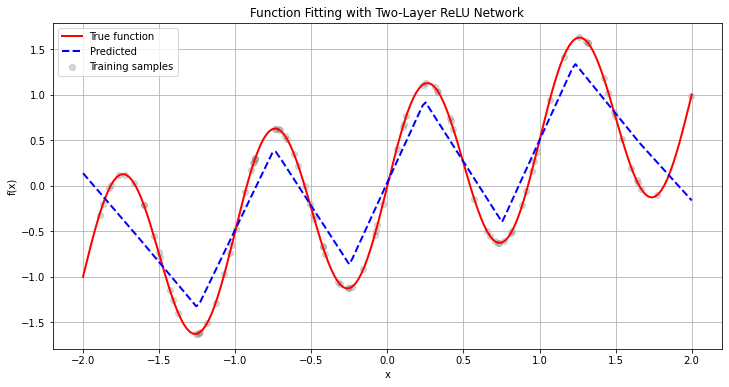

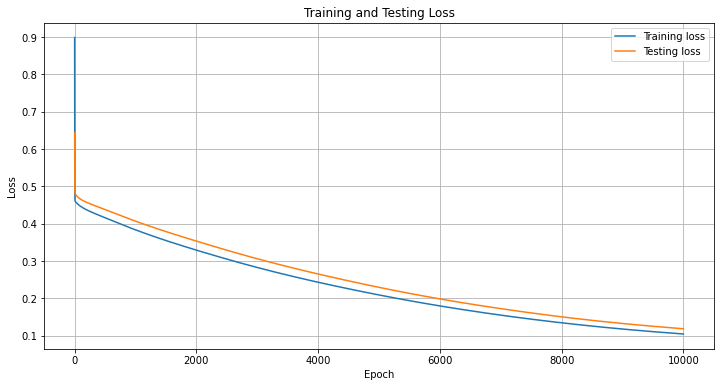

In [27]:
# 预测测试集
with torch.no_grad():
    predicted = model(x_test_tensor).numpy()

# 绘制结果
plt.figure(figsize=(12, 6))
plt.plot(x_test, y_test, 'r-', label='True function', linewidth=2)
plt.plot(x_test, predicted, 'b--', label='Predicted', linewidth=2)
plt.scatter(x_train[:100], y_train[:100], color='gray', alpha=0.3, label='Training samples')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function Fitting with Two-Layer ReLU Network')
plt.grid(True)
plt.show()

# 绘制损失曲线
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Testing loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.grid(True)
plt.show()

## Numpy实现

In [ ]:
# 纯NumPy实现

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 定义目标函数
def target_function(x):
    return np.sin(2 * np.pi * x) + 0.5 * x

# 生成训练集和测试集
np.random.seed(41)
x_train = np.random.uniform(-2, 2, 1000)
print(x_train)
y_train = target_function(x_train)

x_test = np.linspace(-2, 2, 200)
y_test = target_function(x_test)


class NumpyTwoLayerReLUNet:
    def __init__(self, input_size=1, hidden_size=64, output_size=1):
        # 初始化权重和偏置
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2./input_size)
        self.b1 = np.random.randn(1, hidden_size)
        self.W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2./hidden_size)
        self.b2 = np.random.randn(1, output_size)
        
    def relu(self, x):
        return np.maximum(0, x)
    
    def forward(self, x):
        self.z1 = np.dot(x, self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        return self.z2
    
    def train(self, x, y, epochs=2000, lr=0.00001):
        losses = []
        for epoch in range(epochs):
            # 前向传播
            y_pred = self.forward(x)
            
            # 计算损失
            loss = np.mean((y_pred - y)**2)
            losses.append(loss)
            
            # 反向传播
            dy_pred = 2 * (y_pred - y) / y.shape[0]
            dW2 = np.dot(self.a1.T, dy_pred)
            db2 = np.sum(dy_pred, axis=0)
            da1 = np.dot(dy_pred, self.W2.T)
            dz1 = da1 * (self.z1 > 0)
            dW1 = np.dot(x.T, dz1)
            db1 = np.sum(dz1, axis=0)
            
            # 更新参数
            self.W1 -= lr * dW1
            self.b1 -= lr * db1
            self.W2 -= lr * dW2
            self.b2 -= lr * db2
            
            if (epoch+1) % 100 == 0:
                print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss:.6f}')
        
        return losses

# 准备数据
x_train_np = x_train.reshape(-1, 1)
y_train_np = y_train.reshape(-1, 1)
x_test_np = x_test.reshape(-1, 1)

# 训练模型
np_model = NumpyTwoLayerReLUNet()
losses = np_model.train(x_train_np, y_train_np, epochs=10000, lr=0.01)

# 预测
y_pred_np = np_model.forward(x_test_np)

# 绘制结果
plt.figure(figsize=(12, 6))
plt.plot(x_test, y_test, 'r-', label='True function', linewidth=2)
plt.plot(x_test, y_pred_np, 'b--', label='Predicted (NumPy)', linewidth=2)
plt.scatter(x_train[:100], y_train[:100], color='gray', alpha=0.3, label='Training samples')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function Fitting with NumPy Two-Layer ReLU Network')
plt.grid(True)
plt.show()

[-0.99630551 -1.81561672  0.70726496 -1.82612206 -1.53430519  0.41546276
 -1.23627735  0.67406287  1.6697914  -0.32487965 -0.6709606  -0.86786546
 -1.25487093 -0.73155812 -0.07532532 -1.72191813  0.81993029 -0.74129226
  0.98112942 -0.40714882  0.43290584  0.91382595 -0.31296785 -0.42436715
 -1.0711097  -0.23334158 -0.50791442  0.33442416 -1.5998745   0.96540754
 -1.66720827 -1.49510422 -0.70843388  0.57170917  1.99788692 -0.8759934
  0.32889859  1.49040424  1.15735688 -1.12764922 -0.61351148  0.88600257
 -0.5843265  -0.15726278 -1.02240936 -0.86934717  1.30512586  1.49748694
 -1.42892399 -0.87971269  0.10067659  1.60343186  0.40982778  0.76718276
 -0.86962035 -0.89397008 -1.37485166  0.65515364  1.7712339   0.72528597
  1.45193095  1.64602636  1.26136193  1.31899146 -1.8916118  -1.036209
 -0.93469276 -0.47915436 -0.08299321 -0.71432362 -0.25177478  0.2330767
 -0.42539804  0.31305148 -0.48752222 -1.18521322 -0.54311532  0.81209096
  0.94906857  0.730346   -1.59916409 -1.24621547  0.060

ValueError: operands could not be broadcast together with shapes (1000,64) (2,64) 